# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Robert Mason

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [ ]:
# TODO: Import dataset and inspect the first five columns
df = pd.read_csv("/Users/robbie/Desktop/ensf611/Assignments/Assignment 5/seeds_dataset.txt", sep="\t", header =None)
df.columns= ["Area", "Perimeter", "Compactness", "Kernel Length", "Kernel Width", "Assymetry", "Kernel Groove Length","Type"]
df.head()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Assymetry,Kernel Groove Length,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [ ]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = df.iloc[:, 0:7]
y = df["Type"]
print(f"X size = {X.shape}")
print(f"y size = {y.shape}")

X size = (210, 7)
y size = (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

Before we implement the scaler, we need to split the data into training and testing sets first.

In [ ]:
# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# TODO: Print the shape of the training feature matrix and target vector
print(f"X_train size = {X_train.shape}")
print(f"y_train size = {y_train.shape}")

X_train size = (157, 7)
y_train size = (157,)


Now that we have our training data, we can implement our selected scaler.

In [ ]:
# TODO: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [ ]:
# TODO: Instantiate model
model = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [ ]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [ ]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Cross Validation Score:", grid_search.best_score_)
print("Test Score:", grid_search.score(X_test_scaled,y_test))

Best Parameters: {'C': 10.0, 'fit_intercept': True}
Cross Validation Score: 0.9368951612903226
Test Score: 0.9433962264150944


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [ ]:
# TODO: Predict y labels using best estimator
predictions = grid_search.predict(X_test_scaled)

In [ ]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train_scaled)
pca_result = pca.transform(X_train_scaled)

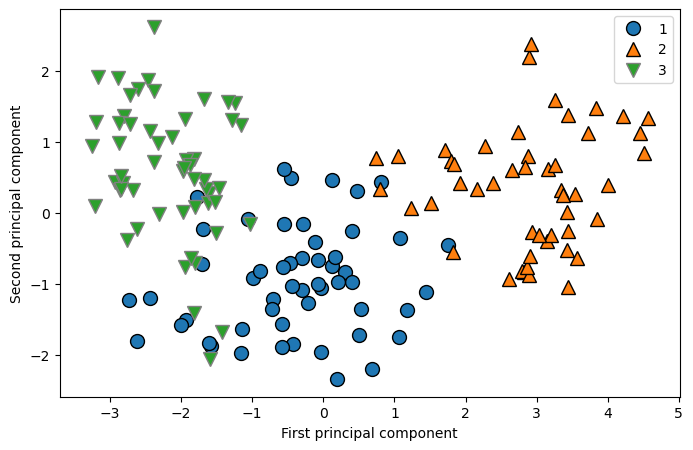

In [ ]:
# TODO: Plot test points colored by predicted label
import matplotlib.pyplot as plt
import mglearn

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(pca_result[:, 0], pca_result[:, 1], y_train)
plt.legend(loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

1. Yes, the logistic regression performed well for this dataset with high training and accuracy scores.
2. Yes, PCA worked well for this model because the predicted classes are clustered together.  From the model used, it appears likely that dataset is linear because both PCA and logistic regression produced good results. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I sourced my code primarily from class examples and labs
2. I completed the steps in the order laid out in the template
3. I did not use any generative AI for this assignment
4. I initally had challenges with visualization of PCA which I used the Lab example to help with

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [ ]:
# TODO: Scale feature matrix
df = pd.read_csv("/Users/robbie/Desktop/ensf611/Assignments/Assignment 5/seeds_dataset.txt", sep="\t", header =None)
df.columns= ["Area", "Perimeter", "Compactness", "Kernel Length", "Kernel Width", "Assymetry", "Kernel Groove Length","Type"]
df_scaled = scaler.fit_transform(df)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

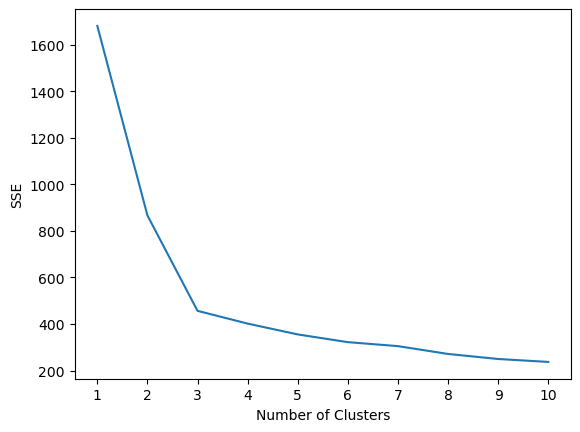

In [ ]:
# TODO: Use the elbow method to determine the optimal number of clusters
#initialize kmeans parameters
from sklearn.cluster import KMeans

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [ ]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X_train_scaled)

In [ ]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score

sils = []
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=4, n_init=10).fit(X_train_scaled)
sils.append(silhouette_score(X_train_scaled, kmeans.labels_ ))
print("Silhouette Score:")
print(sils)

from sklearn.metrics import calinski_harabasz_score

chs = []

kmeans = KMeans(n_clusters=n_clusters, random_state=4, n_init=10).fit(X_train_scaled)
chs.append(calinski_harabasz_score(X_train_scaled, kmeans.labels_ ))
print("Calinski-Harabasz Score:")
print(chs)

from sklearn.metrics import davies_bouldin_score

dbs = []

kmeans = KMeans(n_clusters=n_clusters, random_state=4, n_init=10).fit(X_train_scaled)
dbs.append(davies_bouldin_score(X_train_scaled, kmeans.labels_ ))
print("Davies-Bouldin Score:")
print(dbs)

Silhouette Score:
[0.3938727847257855]
Calinski-Harabasz Score:
[185.40825418838728]
Davies-Bouldin Score:
[0.9553415577062777]


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

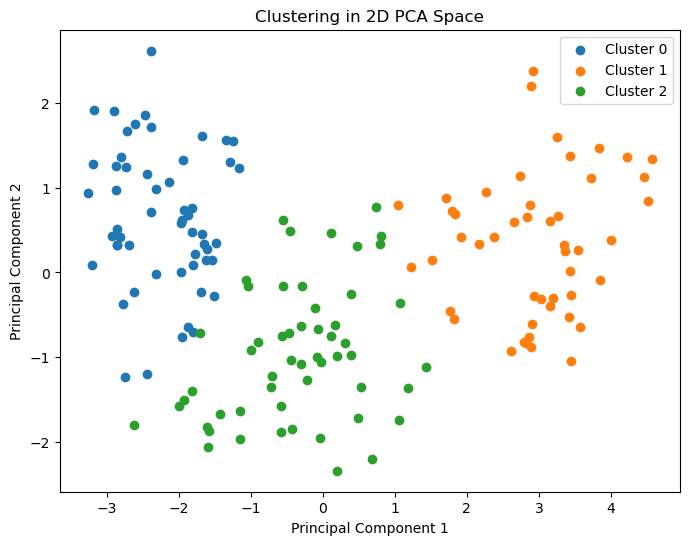

In [ ]:
# TODO: Plot clustering results
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled, X_test_scaled)
plt.figure(figsize=(8, 6))

# Plot data points with different colors for each cluster
for label in set(kmeans.labels_):
    indices = kmeans.labels_ == label
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f'Cluster {label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering in 2D PCA Space')
plt.legend()
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

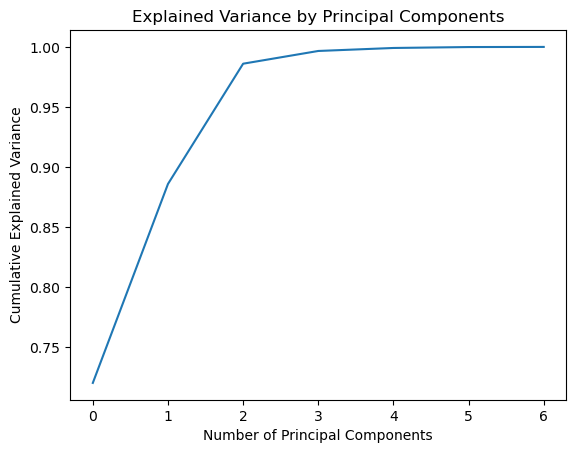

In [ ]:
# TODO: Find the number of principal components using explained variance ratio
from sklearn.decomposition import PCA

pca = PCA()
pca_result = pca.fit_transform(X_train_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [ ]:
# TODO: Use PCA to transform the data
pca = PCA(n_components=2)
pca.fit(X_train_scaled)

PCA(n_components=2)

In [ ]:
# TODO: Implement K-means with the transformed data
predictions = KMeans(n_clusters=3, random_state=0, n_init=10).fit_predict(X_train_scaled)

In [ ]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score

sils = []
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=4, n_init=10).fit(X_train_scaled)
sils.append(silhouette_score(X_train_scaled, kmeans.labels_ ))
print("Silhouette Score:")
print(sils)

from sklearn.metrics import calinski_harabasz_score

chs = []

kmeans = KMeans(n_clusters=n_clusters, random_state=4, n_init=10).fit(X_train_scaled)
chs.append(calinski_harabasz_score(X_train_scaled, kmeans.labels_ ))
print("Calinski-Harabasz Score:")
print(chs)

from sklearn.metrics import davies_bouldin_score

dbs = []

kmeans = KMeans(n_clusters=n_clusters, random_state=4, n_init=10).fit(X_train_scaled)
dbs.append(davies_bouldin_score(X_train_scaled, kmeans.labels_ ))
print("Davies-Bouldin Score:")
print(dbs)

Silhouette Score:
[0.3938727847257855]
Calinski-Harabasz Score:
[185.40825418838728]
Davies-Bouldin Score:
[0.9553415577062777]


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [ ]:
# TODO: Display results

metrics_data = {
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
    'Value': [sils, chs, dbs]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

                    Metric                 Value
0         Silhouette Score  [0.3938727847257855]
1  Calinski-Harabasz Score  [185.40825418838728]
2     Davies-Bouldin Score  [0.9553415577062777]


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*
1. Yes, the number of clusters matched the amount of class labels.
2. Yes, the distribution in both plots is similar. 
3. I used 2 components. Yes, PCA did improve the results by reducing the number of features. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I sourced my code mainly from class and lab examples.
2. I completed the steps in the order laid out in the template. 
3. I did not use any generative AI for this assignment. 
4. I did not run into any challenges in this section. 

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I liked the chance to do a hands on example with PCA because it is somewhat of an abstract concept.  Visualizing the PCA plot helped alot with my understanding. 